# Phase1 : EEG-Tumour Detection


# problem definition:
EEG analysis using advanced algorithms to detect brain tumors. Utilizing machine learning models, it identifies distinct patterns in EEG data, highlighting abnormal electrical activity linked to tumor presence. High-resolution EEG cap designs enhance signal acquisition, capturing minute irregularities. Novel spectral and connectivity analyses unravel subtle biomarkers, distinguishing tumor signatures amidst neural activity. Integration with neuroimaging techniques like MRI strengthens accuracy, enabling precise localization and characterization of tumors. Real-time monitoring and cloud-based collaboration expedite diagnosis and treatment planning. These advancements in EEG-based tumor detection showcase promising strides toward non-invasive, early, and precise identification of brain tumors in clinical settings.

# Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew 
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('EEG_Tumour.csv')
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,result
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [3]:
data.tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,result
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1
14979,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14980 non-null  float64
 1   F7      14980 non-null  float64
 2   F3      14980 non-null  float64
 3   FC5     14980 non-null  float64
 4   T7      14980 non-null  float64
 5   P7      14980 non-null  float64
 6   O1      14980 non-null  float64
 7   O2      14980 non-null  float64
 8   P8      14980 non-null  float64
 9   T8      14980 non-null  float64
 10  FC6     14980 non-null  float64
 11  F4      14980 non-null  float64
 12  F8      14980 non-null  float64
 13  AF4     14980 non-null  float64
 14  result  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [5]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,result
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [6]:
data.dtypes

AF3       float64
F7        float64
F3        float64
FC5       float64
T7        float64
P7        float64
O1        float64
O2        float64
P8        float64
T8        float64
FC6       float64
F4        float64
F8        float64
AF4       float64
result      int64
dtype: object

In [7]:
data.shape

(14980, 15)

In [8]:
data.isnull().sum()

AF3       0
F7        0
F3        0
FC5       0
T7        0
P7        0
O1        0
O2        0
P8        0
T8        0
FC6       0
F4        0
F8        0
AF4       0
result    0
dtype: int64

In [9]:
data.duplicated().sum()


0

In [10]:
data.mean()

AF3       4321.917777
F7        4009.767694
F3        4264.022433
FC5       4164.946326
T7        4341.741075
P7        4644.022379
O1        4110.400160
O2        4616.056904
P8        4218.826610
T8        4231.316200
FC6       4202.456900
F4        4279.232774
F8        4615.205336
AF4       4416.435832
result       0.448798
dtype: float64

In [11]:
data.max()

AF3       309231.00
F7          7804.62
F3          6880.51
FC5       642564.00
T7          6474.36
P7        362564.00
O1        567179.00
O2          7264.10
P8        265641.00
T8          6674.36
FC6         6823.08
F4          7002.56
F8        152308.00
AF4       715897.00
result         1.00
dtype: float64

In [12]:
data.min()

AF3       1030.7700
F7        2830.7700
F3        1040.0000
FC5       2453.3300
T7        2089.7400
P7        2768.2100
O1        2086.1500
O2        4567.1800
P8        1357.9500
T8        1816.4100
FC6       3273.3300
F4        2257.9500
F8          86.6667
AF4       1366.1500
result       0.0000
dtype: float64

In [13]:
data.var()

AF3       6.210424e+06
F7        2.110637e+03
F3        1.973852e+03
FC5       2.721088e+07
T7        1.206786e+03
P7        8.554394e+06
O1        2.116853e+07
O2        8.580566e+02
P8        4.564241e+06
T8        1.447871e+03
FC6       1.427780e+03
F4        1.725930e+03
F8        1.460158e+06
AF4       3.470724e+07
result    2.473949e-01
dtype: float64

In [14]:
data.std()

AF3       2492.072174
F7          45.941672
F3          44.428052
FC5       5216.404632
T7          34.738821
P7        2924.789537
O1        4600.926543
O2          29.292603
P8        2136.408523
T8          38.050903
FC6         37.785981
F4          41.544312
F8        1208.369958
AF4       5891.285043
result       0.497388
dtype: float64

In [15]:
print(skew(data, axis=0, bias=True))

[122.2816192   39.04264771 -13.61379737 122.37552143   7.5611449
 122.35055759 122.37133779  51.09210233 122.32242106  10.22967656
  31.64583561  26.55380958 121.89506508 118.1132164    0.20588877]


In [16]:
print(kurtosis(data, axis=0, bias=True))

[ 1.49588455e+04  3.20910013e+03  2.92099210e+03  1.49741791e+04
  2.57736882e+03  1.49700906e+04  1.49734959e+04  4.48961475e+03
  1.49655131e+04  2.70917855e+03  2.05583430e+03  2.71381221e+03
  1.48969371e+04  1.42095320e+04 -1.95760981e+00]


In [17]:
data.ndim

2

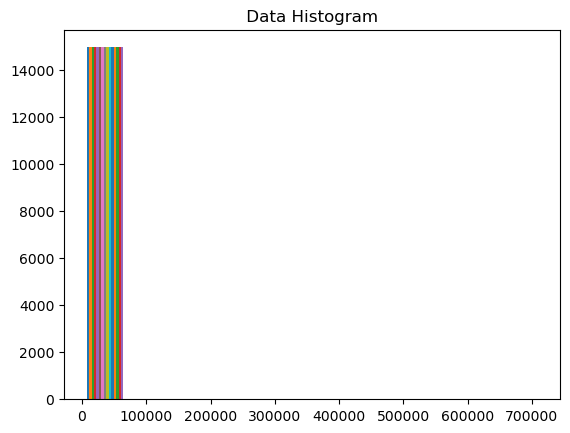

In [18]:
data = pd.DataFrame(data)
plt.hist(data)
plt.title(' Data Histogram ')

# Show the plot
plt.show()

In [19]:
# covariance matrix 
covariance_matrix = np.cov(data)

print("Covariance Matrix:", covariance_matrix)

Covariance Matrix: [[1276941.87592095 1275899.20401286 1275309.44860476 ... 1269201.33978619
  1270762.85992667 1271908.8966581 ]
 [1275899.20401286 1274879.94918857 1274295.11619286 ... 1268183.21013714
  1269741.04107286 1270885.77171   ]
 [1275309.44860476 1274295.11619286 1273729.1459381  ... 1267559.00299524
  1269122.87723333 1270261.78969048]
 ...
 [1269201.33978619 1268183.21013714 1267559.00299524 ... 1261943.72166381
  1263458.78744476 1264596.3094419 ]
 [1270762.85992667 1269741.04107286 1269122.87723333 ... 1263458.78744476
  1264985.14800667 1266126.17728952]
 [1271908.8966581  1270885.77171    1270261.78969048 ... 1264596.3094419
  1266126.17728952 1267286.53184095]]


In [20]:
# chi-square
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(data)
print(f"Chi-square: {chi2_stat:.4f}")

Chi-square: 15792143.7007


In [21]:
# correlation
columns = ['AF3', 'F7','F3','FC5', 'T7', 'P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
corr_matrix = data[columns].corr()
print(corr_matrix)

          AF3        F7        F3       FC5        T7        P7        O1  \
AF3  1.000000  0.261146  0.474569  0.012173  0.278938  0.007958  0.006630   
F7   0.261146  1.000000  0.583317 -0.208922 -0.250816 -0.042288 -0.210591   
F3   0.474569  0.583317  1.000000 -0.330162 -0.272186 -0.596566 -0.335514   
FC5  0.012173 -0.208922 -0.330162  1.000000  0.504616  0.009049  0.999961   
T7   0.278938 -0.250816 -0.272186  0.504616  1.000000  0.409277  0.504231   
P7   0.007958 -0.042288 -0.596566  0.009049  0.409277  1.000000  0.013707   
O1   0.006630 -0.210591 -0.335514  0.999961  0.504231  0.013707  1.000000   
O2   0.040539  0.517816  0.221270  0.130482 -0.030063  0.208167  0.133434   
P8   0.999607  0.264922  0.486506  0.013228  0.264913 -0.012528  0.007638   
T8  -0.070801  0.489010  0.191273 -0.519498 -0.225508  0.420539 -0.515699   
FC6  0.572997  0.317418  0.517950  0.420311  0.336173 -0.196873  0.417041   
F4  -0.394334  0.275977  0.116761  0.515388 -0.095902 -0.229149  0.517621   

In [22]:
data.corr()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,result
AF3,1.000000,0.261146,0.474569,0.012173,0.278938,0.007958,0.006630,0.040539,0.999607,-0.070801,0.572997,-0.394334,0.998714,0.012070,0.010458
F7,0.261146,1.000000,0.583317,-0.208922,-0.250816,-0.042288,-0.210591,0.517816,0.264922,0.489010,0.317418,0.275977,0.251327,-0.071895,-0.079994
F3,0.474569,0.583317,1.000000,-0.330162,-0.272186,-0.596566,-0.335514,0.221270,0.486506,0.191273,0.517950,0.116761,0.500276,-0.637363,0.038902
FC5,0.012173,-0.208922,-0.330162,1.000000,0.504616,0.009049,0.999961,0.130482,0.013228,-0.519498,0.420311,0.515388,-0.005351,0.161155,-0.007531
T7,0.278938,-0.250816,-0.272186,0.504616,1.000000,0.409277,0.504231,-0.030063,0.264913,-0.225508,0.336173,-0.095902,0.267107,0.478852,-0.000369
P7,0.007958,-0.042288,-0.596566,0.009049,0.409277,1.000000,0.013707,0.208167,-0.012528,0.420539,-0.196873,-0.229149,-0.030921,0.988310,-0.007845
O1,0.006630,-0.210591,-0.335514,0.999961,0.504231,0.013707,1.000000,0.133434,0.007638,-0.515699,0.417041,0.517621,-0.011080,0.165730,-0.007223
O2,0.040539,0.517816,0.221270,0.130482,-0.030063,0.208167,0.133434,1.000000,0.047843,0.640387,0.433333,0.577013,0.020493,0.224627,0.025100
P8,0.999607,0.264922,0.486506,0.013228,0.264913,-0.012528,0.007638,0.047843,1.000000,-0.074047,0.577472,-0.385643,0.998849,-0.008055,0.009576
T8,-0.070801,0.489010,0.191273,-0.519498,-0.225508,0.420539,-0.515699,0.640387,-0.074047,1.000000,0.038252,0.132692,-0.082256,0.336282,0.047218


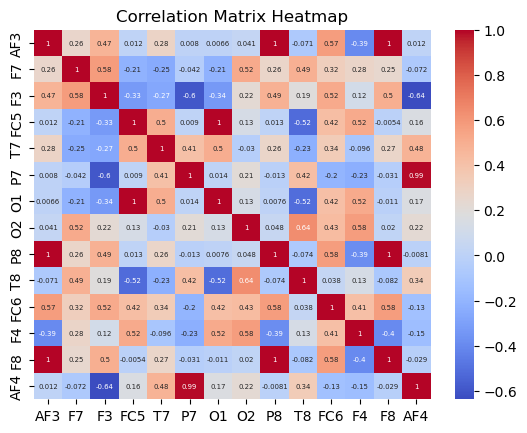

In [33]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot= True , annot_kws={"size": 5})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
#anova test 
group1= data['AF3']
group2 = data['F3']
group3 = data['F7']
group4 = data['FC5']
group5 = data['T7']
group6 = data['P7']
group7 = data['O1']
group8 = data['O2']
group9 = data['P8']
group10 = data['T8']
group11 =data['FC6']
group12 = data['F4']
group13 = data['F8']
group14 = data['AF4']
# sum squares , strength 
f_statistic, p_value = stats.f_oneway(group1,group2,group3,group4,group5,group6,group7,group8,group9,group10,group11,group12,group13,group14)

print("F Statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

F Statistic: 76.14639118019296
P-value: 8.045785998209412e-203
Reject the null hypothesis. There is a significant difference between the means.


In [53]:
df_between = 2  # Number of groups - 1
df_within = len(group1) + len(group2) + len(group3) - 3  # Total number of observations - number of groups

# Calculate mean for each group
mean_group1 = sum(group1) / len(group1)
mean_group2 = sum(group2) / len(group2)
mean_group3 = sum(group3) / len(group3)

# Calculate sum of squares total (SST)
overall_mean = (mean_group1+mean_group2+mean_group3)/3
sst = sum((x - overall_mean) ** 2 for x in group1 + group2 + group3)

# Calculate sum of squares between (SSB)
ssb = len(group1) * (mean_group1 - overall_mean) ** 2 + len(group2) * (mean_group2 - overall_mean) ** 2 + len(group3) * (
        mean_group3 - overall_mean) ** 2

# Calculate sum of squares within (SSW)
ssw = sum((x - mean_group1) ** 2 for x in group1) + sum((x - mean_group2) ** 2 for x in group2) + sum(
    (x - mean_group3) ** 2 for x in group3)

# Calculate mean squares (MS)
ms_between = ssb / df_between
ms_within = ssw / df_within

# Calculate F-test value
f_test = ms_between / ms_within

# Calculate critical F-value
alpha = 0.05  # Significance level
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

# Determine if reject or accept null hypothesis
reject_null = f_test > f_critical

print(f"F-test value: {f_test:.4f}")
print(f"Critical F-value: {f_critical:.4f}")
print(f"SST: {sst:.4f}")
print(f"SSB: {ssb:.4f}")
print(f"SSW: {ssw:.4f}")
print(f"Degrees of freedom - Between: {df_between}, Within: {df_within}")
print(f"MS Between: {ms_between:.4f}")
print(f"MS Within: {ms_within:.4f}")
print(f"P-value: {p_value:.4f}")
print("Reject null hypothesis:", reject_null)

F-test value: 199.3896
Critical F-value: 2.9959
SST: 1151861391159.4460
SSB: 826072188.8864
SSW: 93087118489.5746
Degrees of freedom - Between: 2, Within: 44937
MS Between: 413036094.4432
MS Within: 2071502.7369
P-value: 0.0000
Reject null hypothesis: True


# Feature Reduction

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):
   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [29]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [30]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
knn_pca = KNeighborsClassifier(n_neighbors=3)
accuracy_pca = train_and_evaluate(knn_pca, X_train_pca, X_test_pca, y_train, y_test)
print(f'Accuracy using k-NN with PCA: {accuracy_pca:.2%}')

Accuracy using k-NN with PCA: 54.49%


In [31]:
# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
knn_lda = KNeighborsClassifier(n_neighbors=3)
accuracy_lda = train_and_evaluate(knn_lda, X_train_lda, X_test_lda, y_train, y_test)
print(f'Accuracy using k-NN with LDA: {accuracy_lda:.2%}')

Accuracy using k-NN with LDA: 56.83%


In [33]:
# Singular Value Decomposition (SVD)
import numpy as np

def svd_feature_reduction(data, k):
    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(data, full_matrices=False)

    # Retain only the top k components
    U_reduced = U[:, :k]
    Sigma_reduced = np.diag(Sigma[:k])
    Vt_reduced = Vt[:k, :]

    return U_reduced, Sigma_reduced, Vt_reduced

# Set the number of components to keep (reduce to k dimensions)
k = 2

# Perform SVD for feature reduction
U_reduced, Sigma_reduced, Vt_reduced = svd_feature_reduction(data, k)

# Reconstruct the original matrix using the reduced components
reconstructed_matrix = np.dot(U_reduced, np.dot(Sigma_reduced, Vt_reduced))

print("Original Matrix:")
print(data)
print("\nReconstructed Matrix (with reduced features):")
print(reconstructed_matrix)
print(f'Accuracy: {accuracy:.2%}')

Original Matrix:
           AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

          

NameError: name 'accuracy' is not defined

# Model Implementations

In [34]:
# Naive Bayesian
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
# test result prediction 
predictions = classifier.predict(X_test)

In [36]:
# KNN - CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [37]:
# Create KNN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_minkowski = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)  # Equivalent to 'euclidean'

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_minkowski.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_minkowski = knn_minkowski.predict(X_test)

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)

print(f"Accuracy (Euclidean): {accuracy_euclidean:.4f}")
print(f"Accuracy (Manhattan): {accuracy_manhattan:.4f}")
print(f"Accuracy (Minkowski): {accuracy_minkowski:.4f}")

Accuracy (Euclidean): 0.9722
Accuracy (Manhattan): 0.9693
Accuracy (Minkowski): 0.9722


In [38]:
#Decision Tree (Entropy, and error estimation)
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(X_train,y_train)
prediction=dt.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.468179795282599


In [39]:
# error estimation 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Assume you have features X and labels y

# Create a model
model = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)


print(f"Average Accuracy: {cv_scores.mean():.4f}")


Average Accuracy: 0.4802


In [40]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Neural Network 
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network architecture
def create_neural_network(input_shape, num_classes):
    model = models.Sequential()

    # Add input layer
    model.add(layers.InputLayer(input_shape=input_shape))

    # Add hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Optional dropout for regularization
    model.add(layers.Dense(64, activation='relu'))

    # Add output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Example usage:
# Replace these values with your own dataset characteristics
input_shape = (X_train.shape[1],)
num_classes = 10  # Change this based on your classification task

# Create the neural network
model = create_neural_network(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change if using one-hot encoded labels
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model on your data
# Replace X_train, y_train with your training data and labels
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1920      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 10826 (42.29 KB)
Trainable params: 10826 (42.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


263/263 [==============================] - 2s 3ms/step - loss: 296.8399 - accuracy: 0.5025 - val_loss: 26.6995 - val_accuracy: 0.4542
Epo

In [46]:
# T-test
from scipy import stats
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('EEG_Tumour.csv')

# Extract the column you want to test
column_name = 'AF3'  # Replace with the actual column name

# Get the specific column
column_data = data[column_name]

# Define the null hypothesis mean
null_hypothesis_mean = 30

# Calculate the t-value and p-value
t_value, p_value = stats.ttest_1samp(column_data, null_hypothesis_mean)

# Set the significance level (alpha)
alpha = 0.05

# Find the t-critical value
degrees_of_freedom = len(column_data) - 1  # degrees of freedom
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)  # Use alpha / 2 for a two-tailed test

# Compare t-value and t-critical value
if abs(t_value) > t_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the calculated values
print(f"T-value: {t_value}")
print(f"T-critical value: {t_critical}")
print(f"P-value: {p_value}")


Reject the null hypothesis
T-value: 210.78838867603642
T-critical value: 1.9601223702581971
P-value: 0.0


In [45]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Bayesian Belief Network
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

# Create a synthetic dataset
data = pd.DataFrame({
    'AF3': [0, 1, 0, 1, 0, 1, 0, 1],
    'FC6': [1, 1, 0, 1, 0, 0, 1, 1],
    'FC5': [0, 0, 1, 1, 1, 0, 1, 0]
})

# Define the Bayesian Network structure
model = BayesianModel([('AF3', 'FC6'), ('FC6', 'FC5')])

# Estimate parameters from data using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference = VariableElimination(model)

# Query the probability of AF3 given evidence on FC6 and FC5
query_result = inference.query(variables=['AF3'], evidence={'FC6': 1, 'FC5': 0})
print(query_result)


+--------+------------+
| AF3    |   phi(AF3) |
+========+============+
| AF3(0) |     0.4000 |
+--------+------------+
| AF3(1) |     0.6000 |
+--------+------------+


# Model evaluation  

In [25]:
# Splitting data into 80% training and 20% testing
X = data.drop("result", axis= 1)
y = data["result"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state=1)
# training th eevalutation model , have many traing test 
print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 14980
Number of rows in the training set: 10486
Number of rows in the test set: 4494


In [51]:
# confusion matrix 
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
Accuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(Accuracy))
print('Error rate:', format(1 - Accuracy))


Precision score:  0.4631610219845514
Recall score:  0.773697270471464
F1 score:  0.5794461995911541
Accuracy score:  0.4964396973742768
Error rate: 0.5035603026257232


The model is underfittin ,because its accuracy is close to random guessing, indicating an inability to capture underlying patterns in the data, potentially due to insufficient model complexity or inadequate training.The model is Underfitting ,  recall score is higher than precision.

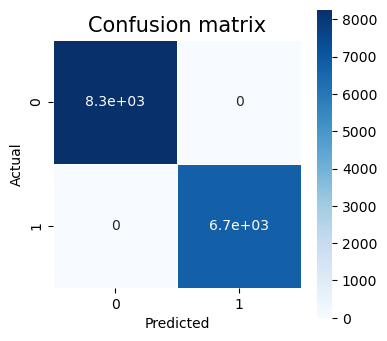

Accuracy: 1.00
Recall: 1.00
F-score: 1.00
Precision: 1.00


In [52]:
y_true = data['result']

# Predicted labels
y_pred = data ['result']

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy, recall, f-score, precision
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f_score = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True,  linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix', size = 15)
plt.show()

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {f_score:.2f}")
print(f"Precision: {precision:.2f}")

Precision score:  0.6261872455902306
Recall score:  0.43785578747628084
F1 score:  0.5153545505304298
Accuracy score:  0.6137071651090342
Error rate: 0.3862928348909658


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


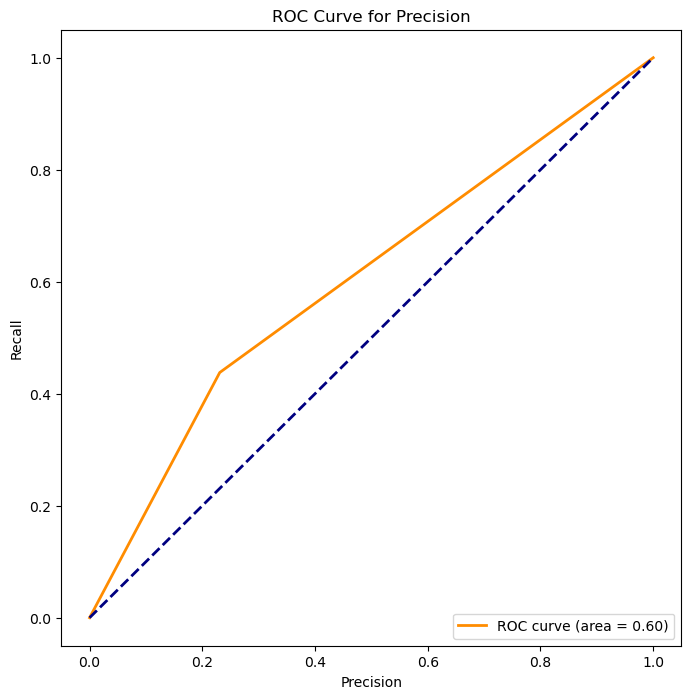

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# Train a logistic regression model (as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

# Create ROC curve for precision
precision, recall, thresholds = roc_curve(y_test, predictions, pos_label=1)
roc_auc = auc(precision, recall)

# Plot ROC curve for precision
plt.figure(figsize=(8, 8))
plt.plot(precision, recall, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('ROC Curve for Precision')
plt.legend(loc="lower right")
plt.show()


In [56]:
# K-fold cross validation and avarage accuracy
# overfittn , evaluate preditvtive model test preformance 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train_all = X_train.copy()  # Create a copy of the original training data

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []

# Loop through each fold in the KFold object
for train_index, test_index in kf.split(X_train_all):
    # Extract training and testing data based on the fold indices
    X_train_fold, X_test_fold = X_train_all.iloc[train_index], X_train_all.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Initialize the model inside the loop
    model = DecisionTreeClassifier(criterion='gini')

    # Train the model on the training fold data
    model.fit(X_train_fold, y_train_fold)

    # Predict labels for the test fold data
    predictions = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test_fold, predictions)

    # Append the accuracy to the list of accuracies
    accuracies.append(accuracy)

# Print the average accuracy across all folds
print(f"Average Accuracy: {np.mean(accuracies):.4f}")


Average Accuracy: 0.8107
